In [ ]:
# exploration exercises

In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 

from env import host, user, password
from wrangle import new_zillow, wrangle_zillow, wrangle_prep_zillow 
# from wrangle_zillow import acquire_zillow, prepare_zillow, wrangle_zillow

import sklearn.preprocessing
from sklearn.model_selection import train_test_split

## Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

### In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

2. Come up with some initial hypotheses based on your goal of predicting property value.

3. Visualize all combinations of variables in some way.

4. Run the appropriate statistical tests where needed.

5. What independent variables are correlated with the dependent variable, home value?

6. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

In [2]:
# getting my zillow data
# wrangle_zillow()

In [3]:
# getting my zillow data
df = wrangle_zillow()

In [4]:
# assigning my prep function to df
df = wrangle_prep_zillow(df)

In [5]:
df.head() # check_yo_head

,bedrooms,bathrooms,square_feet,tax_value,yearbuilt,taxes,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [6]:
# some prep renaming columns for readability
#df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "square_feet", "taxamount": "taxes", "taxvaluedollarcnt": "tax_value"})

In [7]:
df.head() # check_yo_head

,bedrooms,bathrooms,square_feet,tax_value,yearbuilt,taxes,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [8]:
# split the data

train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

((1649637, 7), (255626, 7), (224951, 7))

# bringing in a different wrangle_zillow file to use and get zillow data

from wrangle_zillow import acquire_zillow, prepare_zillow, wrangle_zillow

wrangle_zillow() # this is the new function that I will be using

# Split into train, validate, and test sets
train, validate, test = wrangle_zillow()

In [9]:
train.shape # checking the shape of my train data

(1649637, 7)

In [10]:
validate.shape # checking the shape of my validate data

(224951, 7)

In [11]:
test.shape # checking the shape of my test data

(255626, 7)

<AxesSubplot:>

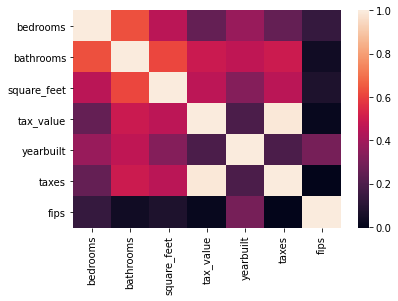

In [12]:
# making a heatmap correlation of my train data ???
sns.heatmap(train.corr())

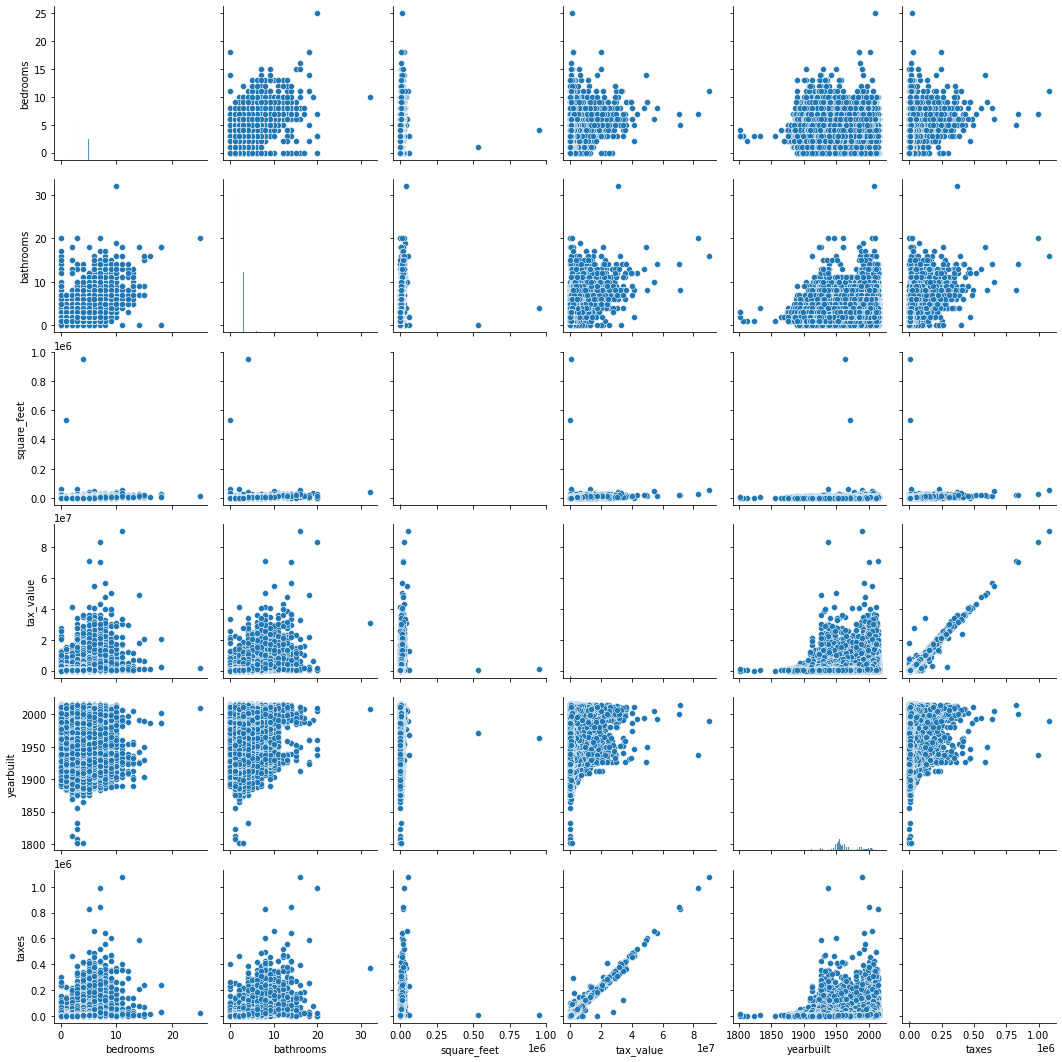

In [13]:
sns.pairplot(train.drop(columns='fips'))

In [14]:
train.bedrooms.value_counts().value_counts()

1         2
224       1
258077    1
26        1
10        1
88        1
3722      1
19414     1
3280      1
841       1
13        1
17674     1
116329    1
487590    1
5         1
4         1
3         1
742335    1
Name: bedrooms, dtype: int64

<AxesSubplot:>

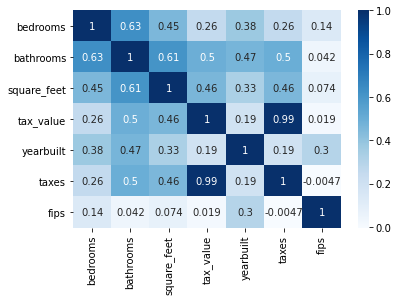

In [15]:
correlation_table = train.corr()
# sns.heatmap(correlation_table, cmap='Blues', annot=True, vmin=0, vmax=1)
sns.heatmap(correlation_table, cmap='Blues', annot=True)

<AxesSubplot:ylabel='Frequency'>

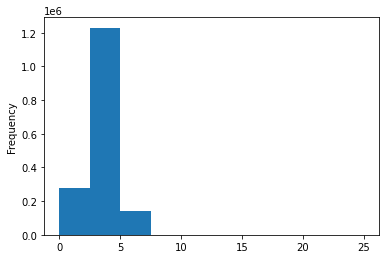

In [16]:
train.bedrooms.plot.hist()

<AxesSubplot:ylabel='Frequency'>

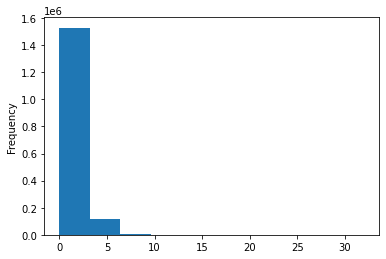

In [17]:
train.bathrooms.plot.hist()

In [18]:
train.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'yearbuilt',
       'taxes', 'fips'],
      dtype='object')

In [19]:
# sns.pairplot(train.drop(columns=['fips', 'year_built']), hue='bathrooms')

In [20]:
train.groupby('bathrooms')

In [21]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,yearbuilt,taxes,fips
30251,3,2,2735,207894,1971,2522,6059
1634157,4,3,2274,645000,1968,7549,6059
467816,2,1,672,294421,1925,4051,6037
438194,4,3,2972,335878,1980,4121,6037
1318124,2,1,2194,502745,1893,6006,6037


<AxesSubplot:>

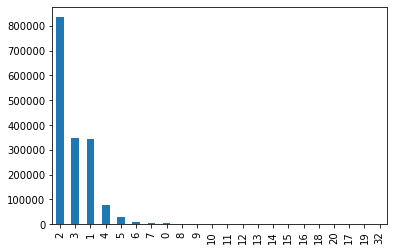

In [22]:
train.bathrooms.value_counts().plot.bar()

In [24]:
train.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'yearbuilt',
       'taxes', 'fips'],
      dtype='object')

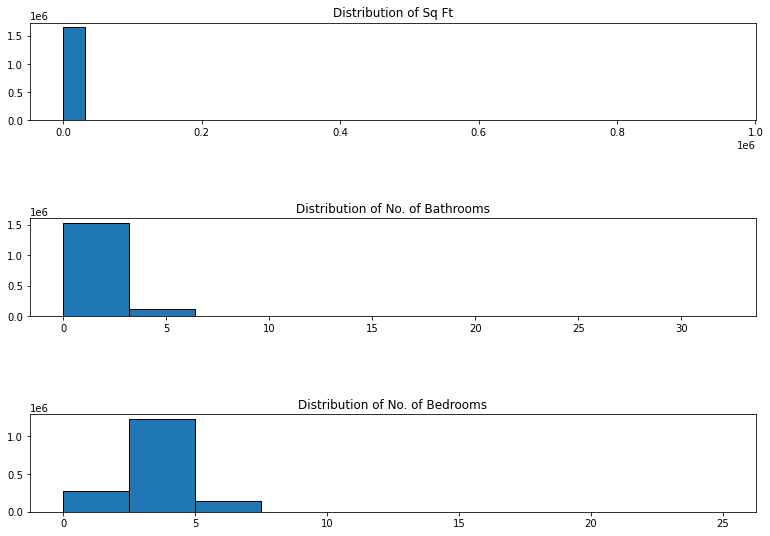

In [26]:
cols = ['square_feet', 'bathrooms','bedrooms','tax_value']


plt.figure(figsize=(13,9))
plt.subplot(3,1,1, title='Distribution of Sq Ft')
plt.hist(data=train, x='square_feet', bins = 30,ec='black')

plt.subplot(3,1,2, title='Distribution of No. of Bathrooms')
plt.hist(data=train, x='bathrooms', ec='black')

plt.subplot(3,1,3, title='Distribution of No. of Bedrooms')
plt.hist(data=train, x='bedrooms',ec='black')

plt.subplots_adjust(hspace=1)
plt.show()

In [28]:
df.isna().sum()

bedrooms       0
bathrooms      0
square_feet    0
tax_value      0
yearbuilt      0
taxes          0
fips           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype
---  ------       -----
 0   bedrooms     int64
 1   bathrooms    int64
 2   square_feet  int64
 3   tax_value    int64
 4   yearbuilt    int64
 5   taxes        int64
 6   fips         int64
dtypes: int64(7)
memory usage: 130.0 MB
